In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the training and testing datasets from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features (pixel values) and labels
x_train = train_data.iloc[:, 1:].values  
y_train = train_data.iloc[:, 0].values   
x_test = test_data.iloc[:, 1:].values    
y_test = test_data.iloc[:, 0].values     


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [2]:
# Define the baseline model
def create_baseline_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8046 - loss: 0.6939 - val_accuracy: 0.9531 - val_loss: 0.1679
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9551 - loss: 0.1566 - val_accuracy: 0.9604 - val_loss: 0.1389
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9692 - loss: 0.1058 - val_accuracy: 0.9672 - val_loss: 0.1130
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9782 - loss: 0.0745 - val_accuracy: 0.9703 - val_loss: 0.1003
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9825 - loss: 0.0586 - val_accuracy: 0.9722 - val_loss: 0.0920
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0466 - val_accuracy: 0.9748 - val_loss: 0.0836
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9752 - val_loss: 0.0847
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9927 - loss: 0.0272 - val_accuracy: 0.

In [3]:
# Define the model with L1 regularization
def create_l1_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l1'),
        layers.Dense(64, activation='relu', kernel_regularizer='l1'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l1_model = create_l1_model()
l1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
l1_history = l1_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5470 - loss: 15.5734 - val_accuracy: 0.8225 - val_loss: 1.5651
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8163 - loss: 1.5180 - val_accuracy: 0.8453 - val_loss: 1.3307
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8375 - loss: 1.3324 - val_accuracy: 0.8597 - val_loss: 1.2212
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8488 - loss: 1.2432 - val_accuracy: 0.8648 - val_loss: 1.1731
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8563 - loss: 1.1837 - val_accuracy: 0.8668 - val_loss: 1.1279
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8622 - loss: 1.1474 - val_accuracy: 0.8732 - val_loss: 1.0949
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8646 - loss: 1.1239 - val_accuracy: 0.8778 - val_loss: 1.0642
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8706 - loss: 1.0832 - val_accuracy: 0

In [4]:
# Define the model with L2 regularization
def create_l2_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l2'),
        layers.Dense(64, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l2_model = create_l2_model()
l2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
l2_history = l2_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7749 - loss: 2.1002 - val_accuracy: 0.9185 - val_loss: 0.6485
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9149 - loss: 0.6359 - val_accuracy: 0.9279 - val_loss: 0.5335
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9219 - loss: 0.5425 - val_accuracy: 0.9306 - val_loss: 0.4975
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9295 - loss: 0.4958 - val_accuracy: 0.9442 - val_loss: 0.4458
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9367 - loss: 0.4599 - val_accuracy: 0.9399 - val_loss: 0.4453
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9353 - loss: 0.4433 - val_accuracy: 0.9435 - val_loss: 0.4170
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9423 - loss: 0.4196 - val_accuracy: 0.9494 - val_loss: 0.3899
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9439 - loss: 0.4003 - val_accuracy: 0.

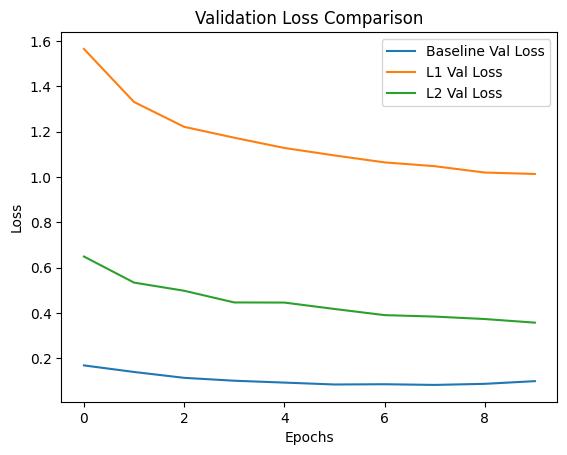

In [5]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for each model
plt.plot(baseline_history.history['val_loss'], label='Baseline Val Loss')
plt.plot(l1_history.history['val_loss'], label='L1 Val Loss')
plt.plot(l2_history.history['val_loss'], label='L2 Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

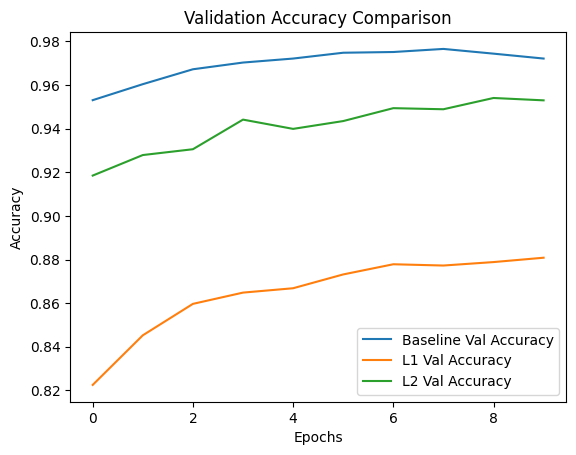

In [6]:
# Plot the training and validation accuracy for each model
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(l1_history.history['val_accuracy'], label='L1 Val Accuracy')
plt.plot(l2_history.history['val_accuracy'], label='L2 Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

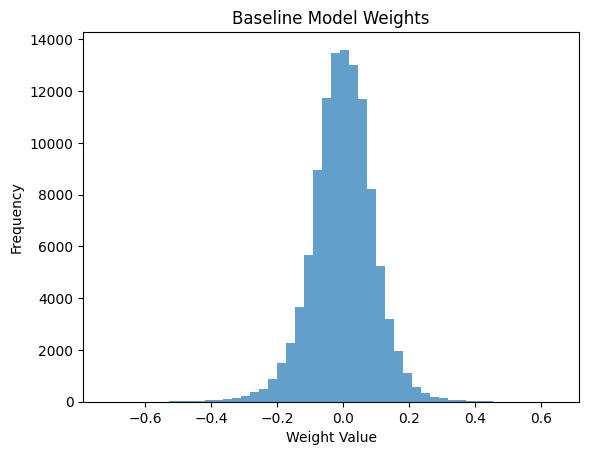

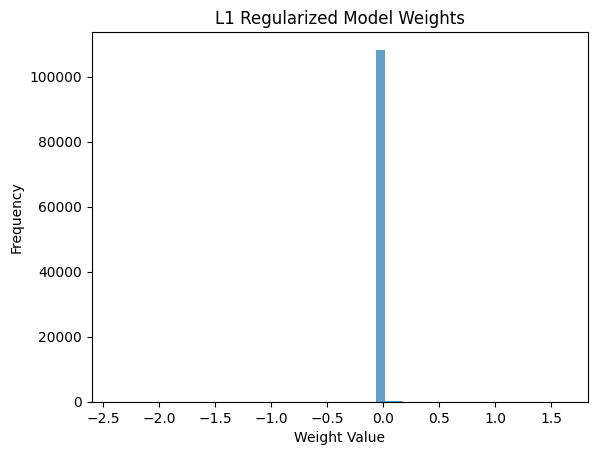

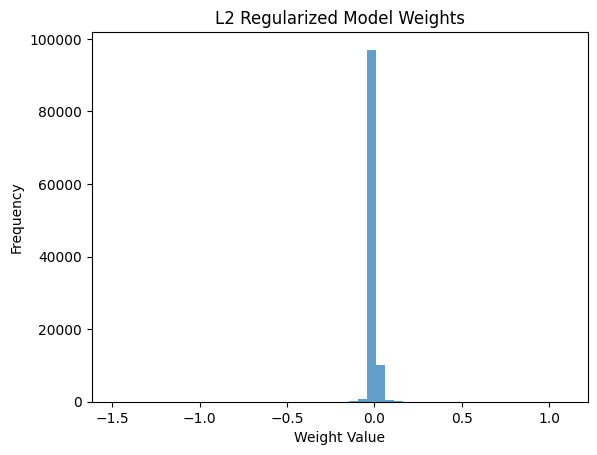

In [7]:
# Function to plot weight distributions
def plot_weight_distribution(model, title):
    weights = []
    for layer in model.layers:
        if isinstance(layer, layers.Dense):
            weights.extend(layer.get_weights()[0].flatten())
    plt.hist(weights, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot weight distributions
plot_weight_distribution(baseline_model, 'Baseline Model Weights')
plot_weight_distribution(l1_model, 'L1 Regularized Model Weights')
plot_weight_distribution(l2_model, 'L2 Regularized Model Weights')